<a href="https://colab.research.google.com/github/ormorteey/STA-237-Time-Series/blob/main/STA_237_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [3]:
%load_ext rpy2.ipython

In [4]:
%%capture
%%R

h = install.packages("pacman")
h = library(pacman)

In [6]:
%%R
p_load("tidyverse", "googledrive")

In [48]:
%%R

# downloading data

drive_deauth()
drive_user()
public_file = drive_get(as_id(c("10i8tM37aqHvD-YH2JK1qZAXzYdawIsgh","1eJ4uXiFqGqsXJ2ut5vex_Lg3BLlUAPjT","1B6pbF90ryhJ-kpu0nQ3FKt6RcSavgCMS")) )

1:3 %>% map(~drive_download(public_file[.,], overwrite = T))

ℹ Not logged in as any specific Google user.
File downloaded:
• 'dfvalid_groundtruth.csv' <id: 10i8tM37aqHvD-YH2JK1qZAXzYdawIsgh>
Saved locally as:
• 'dfvalid_groundtruth.csv'
File downloaded:
• 'dfvalid.h5' <id: 1eJ4uXiFqGqsXJ2ut5vex_Lg3BLlUAPjT>
Saved locally as:
• 'dfvalid.h5'
File downloaded:
• 'dftrain.h5' <id: 1B6pbF90ryhJ-kpu0nQ3FKt6RcSavgCMS>
Saved locally as:
• 'dftrain.h5'
[[1]]
# A dribble: 1 × 4
  name                    local_path              id              drive_resource
  <chr>                   <chr>                   <drv_id>        <list>        
1 dfvalid_groundtruth.csv dfvalid_groundtruth.csv 10i8tM37aqHvD-… <named list […

[[2]]
# A dribble: 1 × 4
  name       local_path id                                drive_resource   
  <chr>      <chr>      <drv_id>                          <list>           
1 dfvalid.h5 dfvalid.h5 1eJ4uXiFqGqsXJ2ut5vex_Lg3BLlUAPjT <named list [36]>

[[3]]
# A dribble: 1 × 4
  name       local_path id                                drive_re

In [ ]:
!rm -r /content/time-series-image-embedding/
!git clone https://github.com/briancknight/time-series-image-embedding.git


In [55]:
airbus_train_path = 'dftrain.h5'
airbus_valid_path = 'dfvalid.h5'
airbus_valid_groundtruth_path = 'dfvalid_groundtruth.csv'
train_df = pd.read_hdf(airbus_train_path)
valid_df = pd.read_hdf(airbus_valid_path)
valid_groundtruth_df = pd.read_csv(airbus_valid_groundtruth_path)


In [56]:

print(valid_groundtruth_df.head())
print(train_df.head())
print(valid_df.tail())
print(valid_groundtruth_df.shape)
print(train_df.shape)
print(valid_df.shape)

   seqID  anomaly
0      0      0.0
1      1      1.0
2      2      0.0
3      3      0.0
4      4      1.0
      0         1         2      ...     61437     61438     61439
0  0.041259  0.041259  0.032573  ...  0.096632  0.077089  0.040173
1 -0.211722 -0.264924 -0.274696  ... -0.838202 -0.880546 -0.739398
2  0.214105  0.154930  0.136640  ...  1.296464  0.937112  0.451879
3 -0.154837 -0.127768 -0.217638  ... -0.173244 -0.063884  0.081208
4 -1.022780 -0.916376 -0.676425  ... -0.916376 -1.010837 -0.804544

[5 rows x 61440 columns]
         0          1          2      ...      61437      61438      61439
589 -18.291415 -18.288957 -18.285270  ... -19.496996 -19.493310 -19.490852
590 -13.352138 -13.352138 -13.352138  ... -13.352138 -13.352138 -13.352138
591   0.031800  -0.143735  -0.059784  ...   0.050880  -0.020352   0.025440
592  -0.026635  -0.026635  -0.006721  ...   0.081399   0.103056   0.113760
593  -1.161032  -0.674459  -0.280623  ...  -0.026497  -0.456464  -0.793693

[5 rows x 614

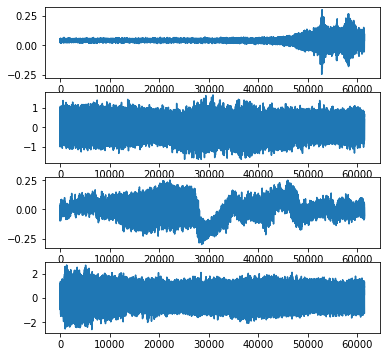

In [44]:
np.random.seed(123)
plt.figure(num = 1, figsize=(6,6))
plt.subplot(411)
plt.plot(train_df.iloc[0,])
plt.subplot(412)
plt.plot(train_df.iloc[100,])
plt.subplot(413)
plt.plot(train_df.iloc[1000,])
plt.subplot(414)
plt.plot(train_df.iloc[np.random.randint(1677),])
plt.show()

In [81]:
valid_groundtruth_df.loc[:,'anomaly'].value_counts()

1.0    297
0.0    297
Name: anomaly, dtype: int64

In [47]:
train_df.shape[1]/512

120.0